### Convert the local ancestry to Alicia's format and plot for ancestry percentage at each locus

In [24]:
import pandas as pd
import numpy as np
# load the local ancestry file
df=pd.read_csv("loc_anc_AA_100Mb_random_400hap_chr1.vcf.txt", delimiter='\t') 
#df=pd.read_csv("loc_anc_AA_100Mb_10deme_400hap_chr1.vcf.txt", delimiter='\t')
# delete child 0-199 and extract poulation 1:EUR only 
df=df.loc[df['child'] > 199].loc[df['populations'] == 1].sort_values('child')

# convert left and right to integer
df['left'] = df['left'].fillna(0.0).astype(int)
df['right'] = df['right'].fillna(0.0).astype(int)

# reindex the df
df=df.reset_index(drop=True)
df

,left,right,populations,child
0,18724418,21325874,1,200
1,70603577,70731785,1,200
2,2189093,2359063,1,200
3,17790610,18724418,1,200
4,70731785,72575472,1,200
...,...,...,...,...
1785,80592446,83793983,1,599
1786,83793983,84657382,1,599
1787,31896973,32568568,1,599
1788,33095823,33481868,1,599


In [25]:
df.loc[1].child-200

0

In [2]:
import pandas as pd
import numpy as np
# create a datafame with all 0
newdf = pd.DataFrame(np.zeros((100000000,400), dtype=np.uint8))
newdf

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99999995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99999996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99999997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99999998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#change all EUR position to 1
for i in range(len(df)):
    l=df.loc[i].left
    r=df.loc[i].right
    c=df.loc[i].child-200
    newdf.loc[l:r,c]=1
newdf

In [ ]:
# output data as a file
np.savetxt('adm_400hap_random_local_anc.txt', newdf, fmt="%d") 

### Plot the variance of the local ancestry at each locus

In [1]:
#Calculate AFR anc percentage for each locus
import pandas as pd
import numpy as np

# output the anc with format of snp, chr, pos, anc
df=pd.read_csv("adm_400hap_random_local_anc.txt", delimiter='\t') 
df.mean(axis=1)


0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
            ..
99999994   NaN
99999995   NaN
99999996   NaN
99999997   NaN
99999998   NaN
Length: 99999999, dtype: float64

In [ ]:
```{r}
library("CMplot")
#load the data
anc1<-read.table("ASW.anc1.annotated", header = F)
colnames(anc1)<-c("SNP","CHR","POS","ANC1")
avganc<-mean(anc1$ANC1)  #0.7602503
var(anc1$ANC1) #0.001381527
CMplot(anc1, plot.type="m", band=0.2, LOG10=FALSE, ylab="AFR anc per locus",threshold=avganc,
        threshold.lty=2, threshold.lwd=3, threshold.col="red", amplify=FALSE, width=14,height=6,
        signal.col=NULL, chr.den.col=NULL, file="jpg",memo="",dpi=300,file.output=TRUE,
        verbose=TRUE,cex=0.8)
```

### convert to local-to-global ancestry and conpare

In [10]:
# Step1: calculate the local to global ancestry from the result file
import pandas as pd
import numpy as np
# load the local ancestry file
df=pd.read_csv("loc_anc_AA_100Mb_10deme_400hap_chr1.vcf.txt", delimiter='\t') 

#extract poulation 0:AFR only and sort by child
df0=df.loc[df['populations'] == 0].sort_values('child')

# create a new column to store the subtraction of right-left
df0['subtraction']=df0["right"]-df0["left"]

# merge child with same number
df1=df0[["child", "subtraction"]]
aggregation_functions = {'subtraction': 'sum'}
df2=df1.groupby(df1['child']).aggregate(aggregation_functions)

# add child that missing in between
n=600 #lagest index number
df3=df2.reindex(range(n+1), fill_value= '0')

# calculate the percentage
df3=df3.apply(pd.to_numeric, errors='coerce') #convert to numeric to calculate
nbp=1e8
df3['percentage']=df3['subtraction']/nbp
df4=df3[["percentage"]]

# calculate global ancestry for every 2 haplotypes
df5=df4.groupby(np.arange(len(df4))//2).mean()

# write to a file
df5.to_csv("loc_to_global_10deme_400hap.txt", sep='\t', encoding='utf-8', index=True)

# Step2: plot local_to_global vs ADMIXTURE global ancestry
import pandas as pd
import numpy as np
# load files
loc_to_glo=pd.read_csv("loc_to_global_10deme_400hap.txt", delimiter='\t')
admixture_glo=pd.read_csv("AA_100Mb_10deme_400hap_chr1_AT_maf0.05_pruned.2.Q", delimiter=' ', header=None)

# combine 2 files together
df=loc_to_glo.merge(admixture_glo, left_index=True, right_index=True)
df.columns = ['id', 'loc_to_glo',  'AFR' ,'EUR']
# see admix ppl only
df=df.loc[df['id']>99]
df

,id,loc_to_glo,AFR,EUR
100,100,0.128186,0.129949,0.870051
101,101,0.063695,0.070527,0.929473
102,102,0.153091,0.151314,0.848686
103,103,0.154217,0.213695,0.786305
104,104,0.290133,0.273814,0.726186
...,...,...,...,...
295,295,0.846515,0.799775,0.200225
296,296,0.768275,0.765659,0.234341
297,297,0.886999,0.893854,0.106146
298,298,0.886472,0.873142,0.126858


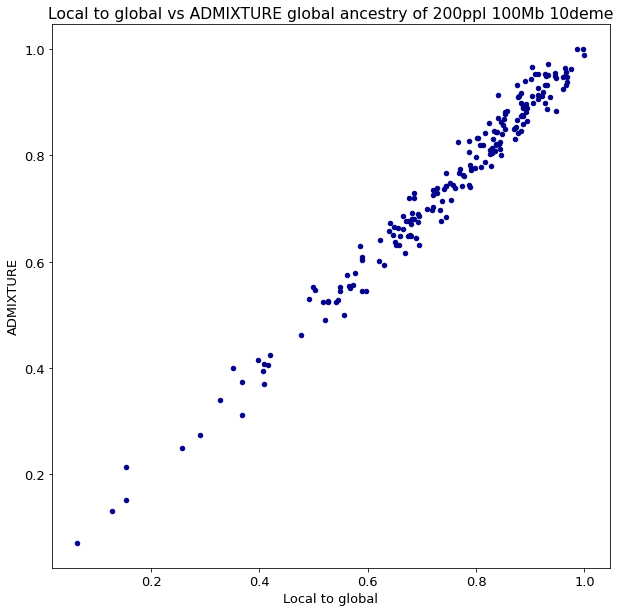

In [18]:
# plot local to global percentage against admixture global 1
import matplotlib.pyplot as plt
p=df.plot.scatter(x='loc_to_glo', y='AFR', c='DarkBlue')
# Add title and axis names
plt.title('Local to global vs ADMIXTURE global ancestry of 200ppl 100Mb 10deme')
plt.xlabel('Local to global')
plt.ylabel('ADMIXTURE')
# change figure size
from IPython.core.pylabtools import figsize
figsize(10, 10)
# change font size
plt.rcParams.update({'font.size': 13})
# Show graph
#plt.show()
# output this figure
plt.savefig("local_to_global_10deme_400hap.png")

In [19]:
# Step1: calculate the local to global ancestry from the result file
import pandas as pd
import numpy as np
# load the local ancestry file
df=pd.read_csv("loc_anc_AA_100Mb_random_400hap_chr1.vcf.txt", delimiter='\t') 

#extract poulation 0:AFR only and sort by child
df0=df.loc[df['populations'] == 0].sort_values('child')

# create a new column to store the subtraction of right-left
df0['subtraction']=df0["right"]-df0["left"]

# merge child with same number
df1=df0[["child", "subtraction"]]
aggregation_functions = {'subtraction': 'sum'}
df2=df1.groupby(df1['child']).aggregate(aggregation_functions)

# add child that missing in between
n=600 #lagest index number
df3=df2.reindex(range(n+1), fill_value= '0')

# calculate the percentage
df3=df3.apply(pd.to_numeric, errors='coerce') #convert to numeric to calculate
nbp=1e8
df3['percentage']=df3['subtraction']/nbp
df4=df3[["percentage"]]

# calculate global ancestry for every 2 haplotypes
df5=df4.groupby(np.arange(len(df4))//2).mean()

# write to a file
df5.to_csv("loc_to_global_random_400hap.txt", sep='\t', encoding='utf-8', index=True)

# Step2: plot local_to_global vs ADMIXTURE global ancestry
import pandas as pd
import numpy as np
# load files
loc_to_glo=pd.read_csv("loc_to_global_random_400hap.txt", delimiter='\t')
admixture_glo=pd.read_csv("AA_100Mb_random_400hap_chr1_AT_maf0.05_pruned.2.Q", delimiter=' ', header=None)

# combine 2 files together
df=loc_to_glo.merge(admixture_glo, left_index=True, right_index=True)
df.columns = ['id', 'loc_to_glo','EUR', 'AFR']
# see admix ppl only
df=df.loc[df['id']>99]
df

,id,loc_to_glo,EUR,AFR
100,100,0.833918,0.165742,0.834258
101,101,0.701201,0.280341,0.719659
102,102,0.643852,0.357184,0.642816
103,103,0.750050,0.273487,0.726513
104,104,0.809222,0.213573,0.786427
...,...,...,...,...
295,295,0.777731,0.259595,0.740405
296,296,0.993542,0.000010,0.999990
297,297,0.855849,0.131727,0.868273
298,298,0.490783,0.504451,0.495549


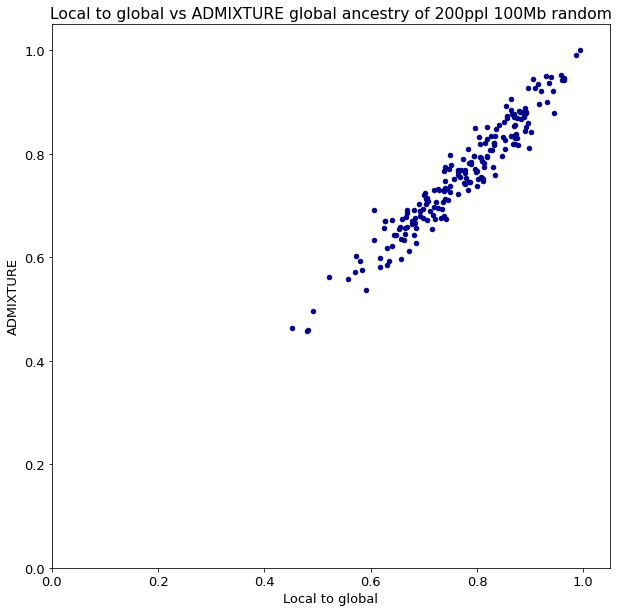

In [23]:
# plot local to global percentage against admixture global 1
import matplotlib.pyplot as plt
p=df.plot.scatter(x='loc_to_glo', y='AFR', c='DarkBlue')
# Add title and axis names
plt.title('Local to global vs ADMIXTURE global ancestry of 200ppl 100Mb random')
plt.xlabel('Local to global')
plt.ylabel('ADMIXTURE')
#set xlim ylim
plt.xlim([0, 1.05])
plt.ylim([0, 1.05])

# change figure size
from IPython.core.pylabtools import figsize
figsize(10, 10)
# change font size
plt.rcParams.update({'font.size': 13})
# Show graph
#plt.show()
# output this figure
plt.savefig("local_to_global_random_400hap.png")